In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
df = pd.read_csv("data/car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.duplicated().sum()

2

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
print(df["Fuel_Type"].value_counts())
print(df["Seller_Type"].value_counts())
print(df["Transmission"].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [10]:
# encodind
df.replace({"Fuel_Type":{'Petrol':0,"Diesel":1,"CNG":2}},inplace=True)
df.replace({"Seller_Type":{'Dealer':0,"Individual":1}},inplace=True)
df.replace({"Transmission":{'Manual':0,"Automatic":1}},inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_1236\1889064976.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Fuel_Type":{'Petrol':0,"Diesel":1,"CNG":2}},inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_1236\1889064976.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Seller_Type":{'Dealer':0,"Individual":1}},inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_1236\1889064976.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To re

In [11]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [12]:
X = df.drop(columns=["Car_Name","Selling_Price"],axis=1)
Y = df["Selling_Price"]

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

In [14]:
lin_reg = LinearRegression()

In [15]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred = lin_reg.predict(x_train)

In [21]:
# metrics
error_score = metrics.r2_score(y_train,y_pred)
error_score

0.8799451660493708

Text(0, 0.5, 'Predicted price')

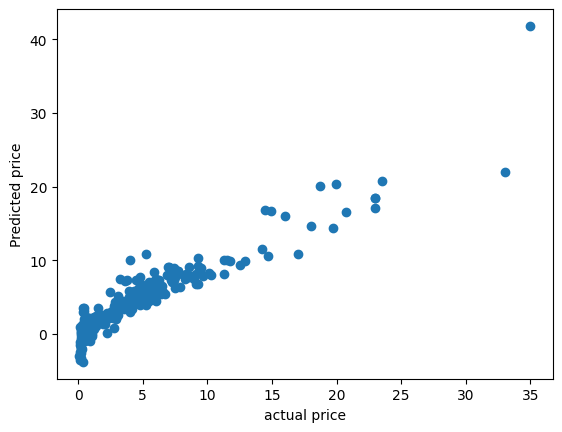

In [22]:
plt.scatter(y_train,y_pred)
plt.xlabel("actual price")
plt.ylabel("Predicted price")

In [24]:
test_data_prediction = lin_reg.predict(x_test)
error_score = metrics.r2_score(y_test,test_data_prediction)
error_score

0.8365766715026374

Text(0, 0.5, 'Predicted price')

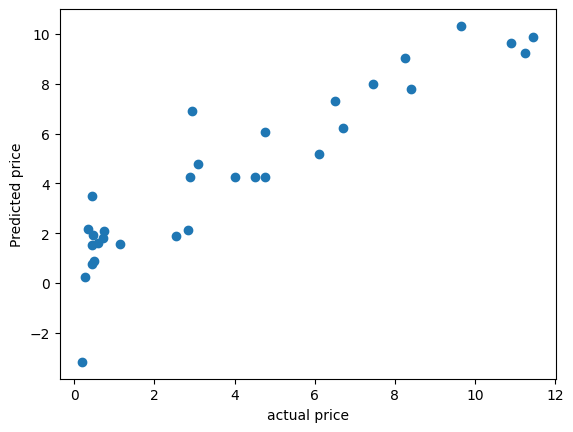

In [26]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("actual price")
plt.ylabel("Predicted price")

In [27]:
Las_reg = Lasso()

In [28]:
Las_reg.fit(x_train,y_train)

Lasso()

In [30]:
y_pred = Las_reg.predict(x_train)
error_score = metrics.r2_score(y_train,y_pred)
error_score

0.8427856123435794

Text(0, 0.5, 'Predicted price')

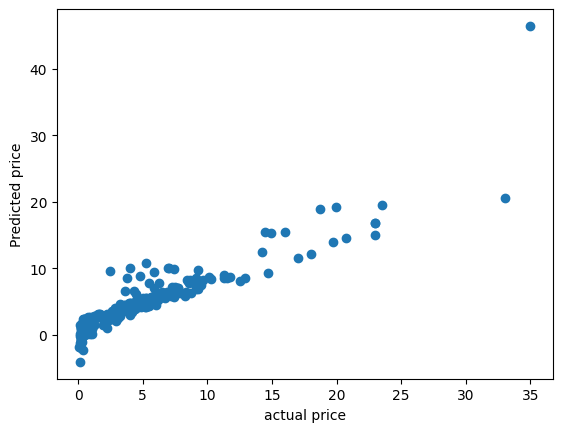

In [31]:
plt.scatter(y_train,y_pred)
plt.xlabel("actual price")
plt.ylabel("Predicted price")

In [32]:
test_data_prediction = lin_reg.predict(x_test)
error_score = metrics.r2_score(y_test,test_data_prediction)
error_score

0.8365766715026374

Text(0, 0.5, 'Predicted price')

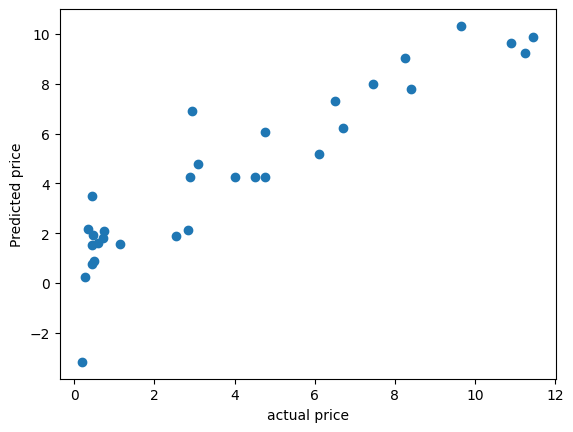

In [33]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("actual price")
plt.ylabel("Predicted price")